<a href="https://colab.research.google.com/github/QwertyJacob/colab_handouts_PSI/blob/main/4.2.3_Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4.2.3 Variabile Aleatoria Gaussiana:
__________________
Addattamento da: 
- Probability and Statistics for Computer Scientists, M. Baron, CRC Press, 2014

La distribuzione normale svolge un ruolo fondamentale nella Probabilità e nella Statistica, principalmente a causa del **Teorema del Limite Centrale**, secondo cui somme e medie tendono spesso ad avere una distribuzione approssimativamente normale. A causa di questo fatto, molte fluttuazioni e errori di misurazione, che consistono nella somma di un gran numero di piccoli termini, risultano distribuiti normalmente.

**Osservazione:** Come affermato dal matematico francese Jules Henri Poincaré:  
> “Tutti credono nella legge normale degli errori: gli sperimentatori perché pensano sia un teorema matematico, i matematici perché pensano sia un fatto sperimentale.”

Oltre a somme, medie ed errori, la distribuzione normale si rivela spesso un buon modello per variabili fisiche come peso, altezza, temperatura, tensione, livello di inquinamento, così come, ad esempio, redditi familiari o voti degli studenti.

La distribuzione normale ha una densità di probabilità (PDF):

$$
f (x) = \frac{1}{\sigma \sqrt{2\pi}} e^{ -\frac{(x - \mu)^2}{2\sigma^2}}, \quad -\infty < x < +\infty,
$$

dove i parametri $ \mu $ e $ \sigma $ hanno un significato semplice rispettivamente come valore atteso $ \mathbb{E}(X) $ e deviazione standard $ \text{Std}(X) $. Questa densità è nota come _curva a campana_, simmetrica e centrata in $ \mu $, la cui dispersione è controllata da $ \sigma $. 

Come mostrato in Figura 4.6 (prova ad eseguire la cella di codice sotto), variare $ \mu $ sposta la curva a sinistra o a destra senza alterarne la forma, mentre variare $ \sigma $ la rende più concentrata o più piatta. Spesso $ \mu $ e $ \sigma $ sono chiamati parametri di _posizione_ e _scala_.

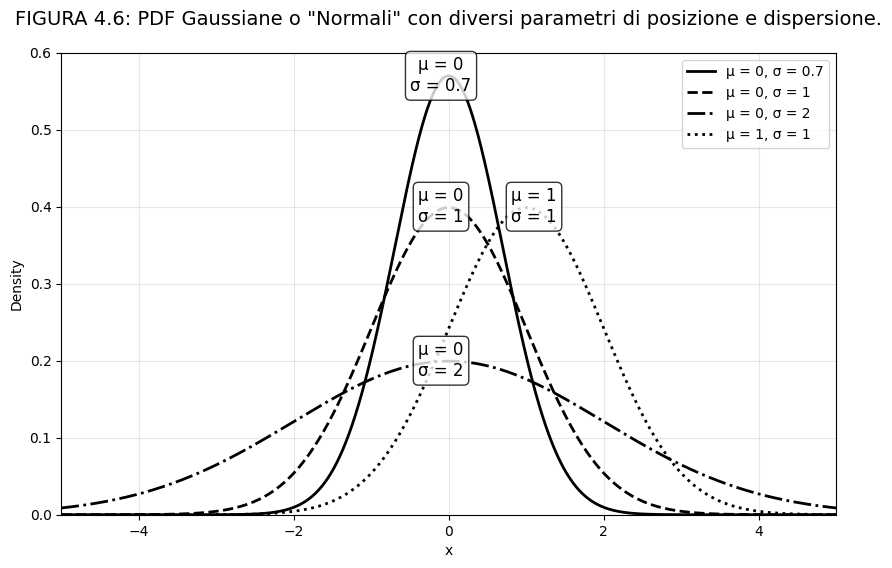

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Impostazioni della figura
plt.figure(figsize=(10, 6))

# Dominio x
x = np.linspace(-5, 5, 1000)

# Funzione densità di probabilità normale
def normal_pdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Plot delle distribuzioni
plt.plot(x, normal_pdf(x, 0, 0.7), 'k-', linewidth=2, label='μ = 0, σ = 0.7')
plt.plot(x, normal_pdf(x, 0, 1),   'k--', linewidth=2, label='μ = 0, σ = 1')
plt.plot(x, normal_pdf(x, 0, 2),   'k-.', linewidth=2, label='μ = 0, σ = 2')
plt.plot(x, normal_pdf(x, 1, 1),   'k:',  linewidth=2, label='μ = 1, σ = 1')

# Aggiungiamo le etichette direttamente vicino alle curve (come nella figura)
plt.text(-0.1, 0.57, 'μ = 0\nσ = 0.7', fontsize=12, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))
plt.text(-0.1, 0.40, 'μ = 0\nσ = 1', fontsize=12, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))
plt.text(1.1, 0.40, 'μ = 1\nσ = 1', fontsize=12, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))
plt.text(-0.1, 0.20, 'μ = 0\nσ = 2', fontsize=12, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=0.8))

# Stile e dettagli finali
plt.title('FIGURA 4.6: PDF Gaussiane o "Normali" con diversi parametri di posizione e dispersione.', 
          fontsize=14, pad=20)
plt.xlabel('x')
plt.ylabel('Density')
plt.xlim(-5, 5)
plt.ylim(0, 0.6)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')

# Mostra il grafico
plt.show()

**Distribuzione normale**

- $ \mu $: valore atteso, parametro di posizione
- $ \sigma $: deviazione standard, parametro di scala
- $ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}, \quad -\infty < x < \infty $
- $ \mathbb{E}(X) = \mu $
- $ \text{Var}(X) = \sigma^2 $

**Distribuzione normale standard**

> **DEFINIZIONE 4.3**  La distribuzione normale con parametri standard $ \mu = 0 $ e $ \sigma = 1 $ è detta **distribuzione normale standard**.

**Notazione**

- $ Z $: variabile aleatoria normale standard
- $ \varphi(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2 / 2} $: funzione di densità della normale standard (PDF)
- $ \Phi(x) = \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2} dz $: funzione di ripartizione della normale standard (CDF)

Una variabile normale standard, solitamente indicata con $ Z $, può essere ottenuta da una variabile aleatoria normale non standard $ X \sim \text{Normale}(\mu, \sigma) $ mediante standardizzazione, ovvero sottraendo la media e dividendo per la deviazione standard:

$$
Z = \frac{X - \mu}{\sigma}. \quad \tag{4.16}
$$

Ripristinando la standardizzazione, possiamo ricostruire la variabile iniziale $ X $:

$$
X = \mu + \sigma Z. \quad (4.17)
$$

Mediante queste trasformazioni, ogni variabile aleatoria normale può essere ottenuta a partire da una variabile normale standard $ Z $; pertanto, è sufficiente disporre di una tabella della distribuzione normale standard, alla quale chiameremo [**tabella Z**](https://www.math.arizona.edu/~jwatkins/normal-table.pdf).

Per trovare $ \Phi(z) $ dalla Tabella Z, si individua la riga corrispondente alla parte intera e la prima cifra decimale di $ z $ e la colonna corrispondente alla seconda decimale di $ z $, quindi si legge la probabilità $ \Phi(z) $ all'incrocio. Si osservi che $ \Phi(z) \approx 0 $ (è “praticamente” zero) per tutti i valori $ z < -3.9 $, e $ \Phi(z) \approx 1 $ (è “praticamente” uno) per tutti i valori $ z > 3.9 $.

> **Esempio 4.10 (Calcolo di probabilità della Normale standard).** Per una variabile aleatoria normale standard $ Z $,

$$
P(Z < 1.35) = \Phi(1.35) = 0.9115
$$

$$
P(Z > 1.35) = 1 - \Phi(1.35) = 0.0885
$$

$$
P(-0.77 < Z < 1.35) = \Phi(1.35) - \Phi(-0.77) = 0.9115 - 0.2206 = 0.6909,
$$

secondo quanto riportato nella Tabella Z. Si osservi che $ P(Z < -1.35) = 0.0885 = P(Z > 1.35) $, fatto spiegabile grazie alla simmetria della PDF normale standard mostrata in Figura 4.6. A causa di questa simmetria, “la coda sinistra”, ovvero l’area a sinistra di $ -1.35 $, è uguale a “la coda destra”, ovvero l’area a destra di $ 1.35 $.

♦


In effetti, la simmetria della densità normale menzionata in questo esempio consente di ottenere la prima parte della Tabella Z direttamente dalla seconda parte, grazie alla relazione:

$$
\Phi(-z) = 1 - \Phi(z), \quad \text{per } -\infty < z < +\infty.
$$

> **Ricorda**: Per calcolare probabilità relative a una variabile aleatoria normale arbitraria $ X $, è necessario prima standardizzarla, come in (4.16), e poi utilizzare la Tabella Z.

> **Esempio 4.11 (Calcolo di probabilità non standard della Normale).** Supponiamo che il reddito medio delle famiglie in un certo paese sia di 900 monete, con deviazione standard di 200 monete. Assumendo una distribuzione normale dei redditi, calcolare la proporzione di “classe media”, ovvero delle famiglie il cui reddito è compreso tra 600 e 1200 monete.

**Soluzione.** Standardizziamo e usiamo la Tabella A4. Per una variabile $ X \sim \text{Normale}(\mu = 900, \sigma = 200) $, si ha:

$$
P(600 < X < 1200) = P\left( \frac{600 - \mu}{\sigma} < \frac{X - \mu}{\sigma} < \frac{1200 - \mu}{\sigma} \right)
$$

$$
= P\left( \frac{600 - 900}{200} < Z < \frac{1200 - 900}{200} \right) = P(-1.5 < Z < 1.5)
$$

$$
= \Phi(1.5) - \Phi(-1.5) = 0.9332 - 0.0668 = 0.8664.
$$

♦



Finora abbiamo calcolato probabilità di eventi ben definiti. Questi sono problemi diretti. Numerose applicazioni richiedono invece la soluzione di un problema inverso, ossia trovare un valore di $ x $ dato il corrispondente valore di probabilità.

> **Esempio 4.12 (Problema inverso).** Il governo del paese considerato nell’Esempio 4.11 decide di assegnare buoni alimentari al 3% delle famiglie più povere. Al di sotto di quale reddito le famiglie riceveranno i buoni alimentari?

**Soluzione.** Dobbiamo trovare un reddito $ x $ tale che $ P(X < x) = 0.03 $. Questa è un’equazione risolvibile rispetto a $ x $. Ancora una volta, standardizziamo prima e poi usiamo la tabella:

$$
P(X < x) = P\left( Z < \frac{x - \mu}{\sigma} \right) = \Phi\left( \frac{x - \mu}{\sigma} \right) = 0.03.
$$

Da cui:

$$
x = \mu + \sigma \cdot \Phi^{-1}(0.03).
$$

Nella Tabella A4, dobbiamo cercare il valore di $ z $ tale che $ \Phi(z) \approx 0.03 $. Si osserva che $ \Phi(-1.88) \approx 0.03 $. Quindi, $ \Phi^{-1}(0.03) = -1.88 $, e

$$
x = 900 + 200 \cdot (-1.88) = 900 - 376 = 524 \text{ (monete)}.
$$

Questa è la risposta. In letteratura, il valore $ \Phi^{-1}(\alpha) $ è spesso indicato con $ z_{1-\alpha} $.

♦

> **Ricorda**: Come si vede da questo esempio, per risolvere un problema inverso si utilizza innanzitutto la tabella per trovare il quantile standard, quindi si procede alla destandardizzazione, come in (4.17), al fine di ottenere il valore richiesto di $ x $.
